### 경로 데이터 불러오기 / 보간

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

filenames = []

# CSV 파일에서 경로 데이터를 추출하는 함수
def extract_lat_lng_from_csv(directory):
    all_lat_lng_lists = []
    file_count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filenames.append(filename)
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            lat_lng_list = [(row['lat'], row['lng']) for index, row in df.iterrows()]
            all_lat_lng_lists.append(lat_lng_list)
    return all_lat_lng_lists

# 경로 데이터를 보간하여 동일한 길이로 만드는 함수
def interpolate_path(path, num_points=10):
    latitudes = [point[0] for point in path]
    longitudes = [point[1] for point in path]
    distances = np.linspace(0, 1, len(path))
    interp_lat = interp1d(distances, latitudes, kind='linear')
    interp_lon = interp1d(distances, longitudes, kind='linear')
    new_distances = np.linspace(0, 1, num_points)
    new_latitudes = interp_lat(new_distances)
    new_longitudes = interp_lon(new_distances)
    return np.column_stack((new_latitudes, new_longitudes)).flatten()

# 경로 데이터를 읽어오는 경로 설정
directory_path = "./어디쉐어/어디쉐어 isolation forest"
lat_lng_values = extract_lat_lng_from_csv(directory_path)

# 보간된 경로 벡터들
path_vectors = np.array([interpolate_path(path) for path in lat_lng_values])




### 경로 데이터 시각화 (입력 데이터)

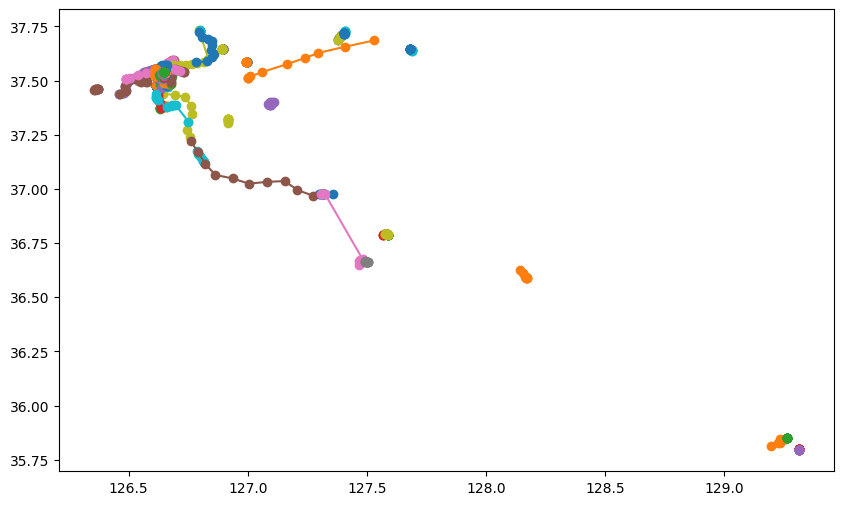

In [2]:
# 경로 벡터 시각화
plt.figure(figsize=(10, 6))

for i, path in enumerate(path_vectors):
    latitudes = path[::2]  # 짝수 인덱스는 위도
    longitudes = path[1::2]  # 홀수 인덱스는 경도
    plt.plot(longitudes, latitudes, marker='o', label=f'Path {i+1}')

### DBSCAN 모델로 이상치 판단 및 시각화 (출력 데이터)

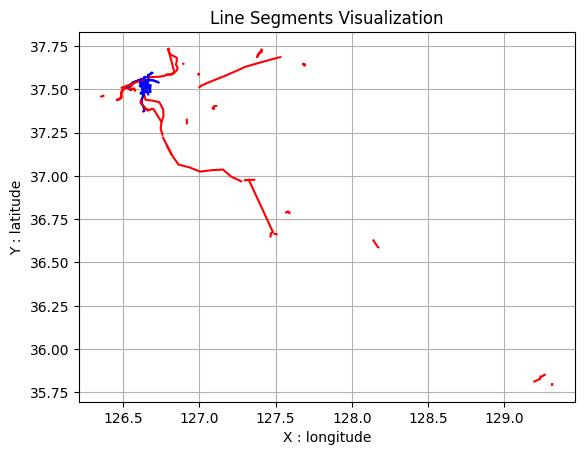

In [13]:
# Isolation Forest 모델 적용
isolation_forest = IsolationForest(contamination= 0.1, random_state=100)
labels = isolation_forest.fit_predict(path_vectors)

# 시각화
for segment, label in zip(path_vectors, labels):
    x_coords = segment[1::2]
    y_coords = segment[0::2]
    color = 'red' if label == -1 else 'blue'
    plt.plot(x_coords, y_coords, color=color)

plt.title('Line Segments Visualization')
plt.xlabel('X : longitude')
plt.ylabel('Y : latitude')
plt.grid(True)
plt.show()

### 이상치 여부를 원본 CSV 파일에 기록

In [4]:
# 이상치 여부를 'dbscan output' 열에 기록하는 함수

def record_outliers(directory, labels, filenames):
 
    for label, filename in zip(labels, filenames):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        if 'dbscan output' not in df.columns:
            df['dbscan output'] = 1  # 기본값 1로 설정
        if label == -1:
            df['dbscan output'] = -1  # 이상치일 경우 -1로 설정
        df.to_csv(filepath, index=False)

# 이상치 여부를 CSV 파일에 기록
record_outliers(directory_path, labels, filenames)


### DBSCAN 이상경로 파일명 출력

In [8]:
# 이상경로 파일명을 텍스트로 출력하는 함수
def print_outlier_paths_with_filenames(labels, filenames):
    print('--------outlier_paths--------')
    for label, filename in zip(labels, filenames):
        if label == -1:
            print(filename)

# 이상경로 파일명을 텍스트로 출력
outlier_paths = print_outlier_paths_with_filenames(labels, filenames)


--------outlier_paths--------
20230429074729.csv
20230429084545.csv
20230430160248.csv
20230430184009.csv
20230430190656.csv
20230430220837.csv
20230505122923.csv
20230505125302.csv
20230505150709.csv
20230506175525.csv
20230508084115.csv
20230527205922.csv
20230527221824.csv
20230701220126.csv
20230708184137.csv
20230708211224.csv
20230710075720.csv
20230715132948.csv
20230715154101.csv
20230715194033.csv
20230716140812.csv
20230718211727.csv
20230812122439.csv
20230812125121.csv
20230813201825.csv
20230814113500.csv
20230829192601.csv
20230910105144.csv
20231001111709.csv
20231001150901.csv
20231002105108.csv
20231003181802.csv
20231021173304.csv
20231029134829.csv
20231118193700.csv
20231118205801.csv
20231118211032.csv
20231118213855.csv
20231118214840.csv
20231130103911.csv
20231130105717.csv
20231130111100.csv
20231130164543.csv
20231202151537.csv
20231202171651.csv
20231202211845.csv
20231202230952.csv
